In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from torch.autograd import Variable

In [4]:
# Load the Preprocess the Data
train_df = pd.read_csv("/kaggle/input/Kannada-MNIST/train.csv")
test_df = pd.read_csv("/kaggle/input/Kannada-MNIST/test.csv")
print(train_df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0       0       0   
3      3       0       0       0       0       0       0       0       0   
4      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [5]:
train_df['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
# Normalize the pixel values
train = train_df.drop('label', axis=1).values
train = train.reshape(-1, 28, 28, 1) / 255.0
train.shape

(60000, 28, 28, 1)

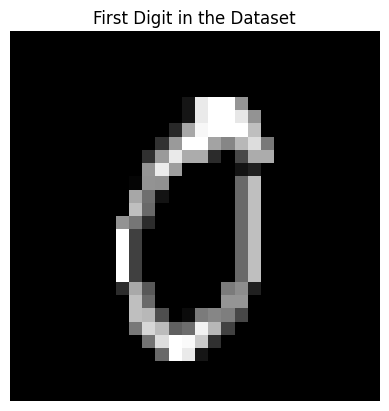

In [7]:
import matplotlib.pyplot as plt
# Visualize the first digit
first_image = train[0, :, :, 0]
plt.imshow(first_image, cmap='gray')  # 'gray' colormap to display the image in grayscale
plt.title('First Digit in the Dataset')
plt.axis('off')
plt.show()

In [10]:
# Preparing the data for training and evaluation
X_train, X_test, y_train, y_test = train_test_split(train, train_df['label'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape
INPUT_SHAPE = [28, 28, 1]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf

# Build the TensorFlow/Keras model for image classification 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=5,
                           padding='same',
                           input_shape=INPUT_SHAPE,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=5,
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')

])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
# Train the above defined convolutional neural network using TensorFlow/Keras
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=30,
                    validation_data=(X_test, y_test))

Epoch 1/30
1407/1407 [==============================] - 77s 52ms/step - loss: 0.1486 - accuracy: 0.9597 - val_loss: 0.0444 - val_accuracy: 0.9859
Epoch 2/30
1407/1407 [==============================] - 70s 50ms/step - loss: 0.0537 - accuracy: 0.9844 - val_loss: 0.0228 - val_accuracy: 0.9937
Epoch 3/30
1407/1407 [==============================] - 69s 49ms/step - loss: 0.0370 - accuracy: 0.9891 - val_loss: 0.0315 - val_accuracy: 0.9915
Epoch 4/30
1407/1407 [==============================] - 70s 49ms/step - loss: 0.0342 - accuracy: 0.9905 - val_loss: 0.0269 - val_accuracy: 0.9919
Epoch 5/30
1407/1407 [==============================] - 70s 50ms/step - loss: 0.0282 - accuracy: 0.9917 - val_loss: 0.0196 - val_accuracy: 0.9939
Epoch 6/30
1407/1407 [==============================] - 70s 50ms/step - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.0154 - val_accuracy: 0.9957
Epoch 7/30
1407/1407 [==============================] - 69s 49ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.0248 -

469/469 [==============================] - 7s 15ms/step - loss: 0.0200 - accuracy: 0.9959
Validation accuracy: 99.59%


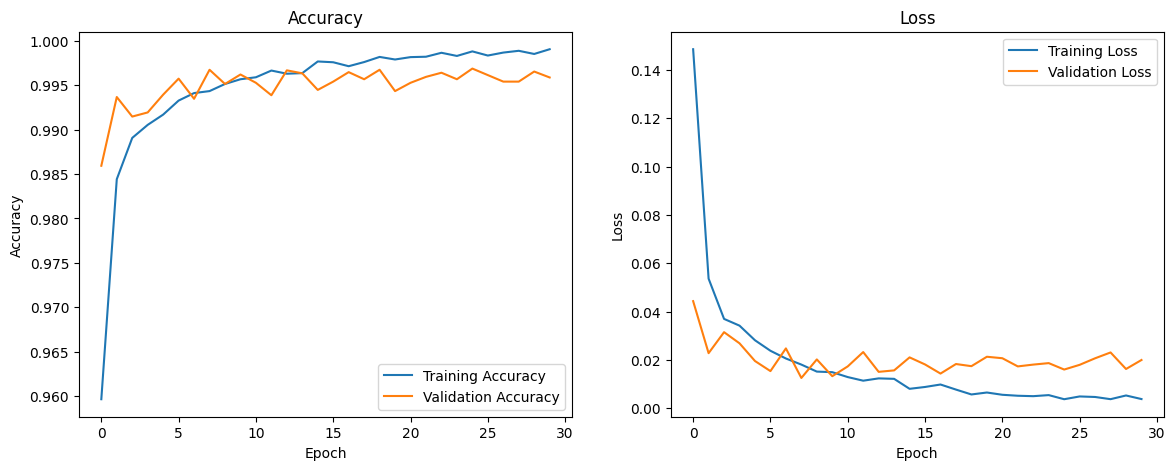

In [14]:
# Evaluate the model on test set
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

# Plot the training history
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [15]:
# Make predictions with the trained model on the test dataset and then converting those predictions into class labels.
y_preds = model.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
y_preds[:5]

469/469 [==============================] - 6s 13ms/step


array([1, 6, 2, 5, 5])

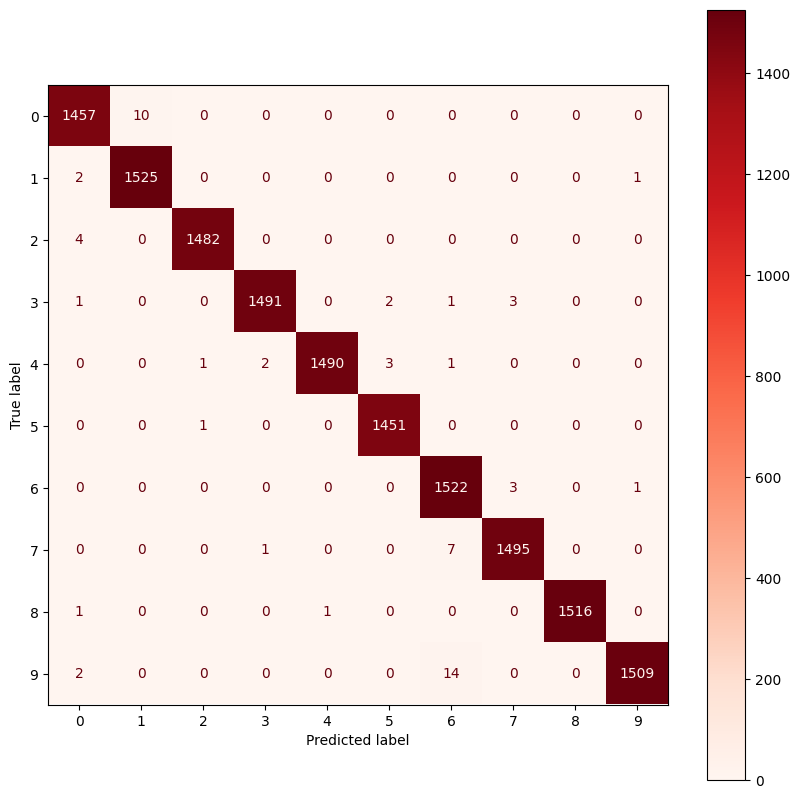

In [25]:
# Create and display a confusion matrix for the predictions
cm = confusion_matrix(y_test, y_preds)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax, cmap=plt.cm.Reds)

In [26]:
test_df.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test_img = test_df.drop('id', axis=1).values.reshape(-1,28,28,1)/255.0
preds = np.argmax(model.predict(test_img), axis=1)
preds

157/157 [==============================] - 2s 13ms/step


array([3, 0, 2, ..., 1, 6, 3])

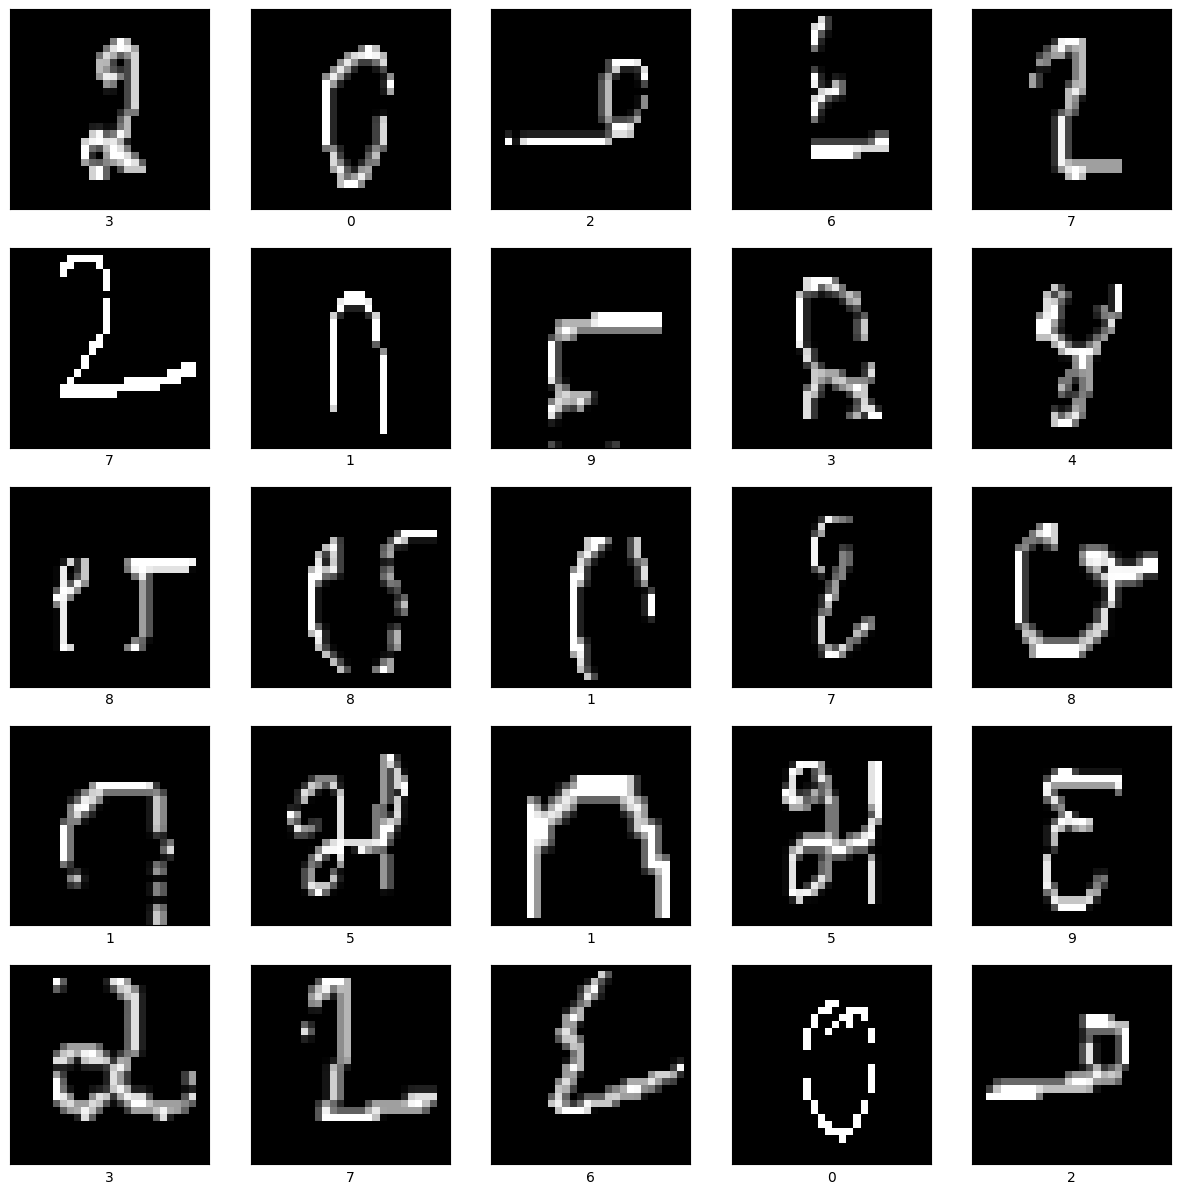

In [38]:
def randomTest(preds):
  fig, ax = plt.subplots(5, 5, figsize=(15, 15))
  
  for index, axi in enumerate(ax.flat):
    axi.imshow(test_img[index].reshape(28, 28), cmap='gray', interpolation='nearest')
    axi.set(xticks=[], yticks=[],
            xlabel=str(preds[index]))
randomTest(preds)